In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

---
# IceCreamData

Dentro de este dataset se encuentran 2 columnas, la primera son los valores de temperatura promedio en un dia y la segunda contiene los ingresos recibidos en ese mismo dia.

In [2]:
df = pd.read_csv('http://virtualfif.uaq.mx/diplomado/data/practica_1/IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
df.shape

(500, 2)

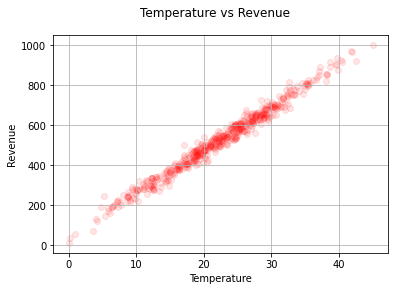

In [5]:
plt.suptitle('Temperature vs Revenue')
plt.scatter(df['Temperature'], df['Revenue'], c = 'red', alpha = 0.1)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.grid()
plt.show()

C:\Users\Tank3\.conda\envs\ML2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

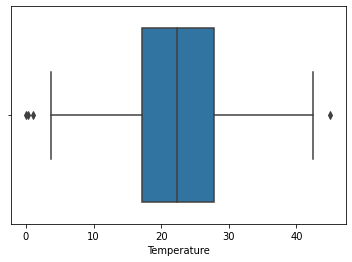

In [6]:
sbn.boxplot(df['Temperature'])

In [7]:
Q1 = df['Temperature'].quantile(0.25)
Q2 = df['Temperature'].quantile(0.50)
Q3 = df['Temperature'].quantile(0.75)
print(f'{Q1}, {Q2}, {Q3}')

17.122257677500002, 22.392790509999998, 27.7406742975


In [8]:
IQR = Q3 - Q1
print(f'Rango intercuartílico: {IQR}')

Rango intercuartílico: 10.618416619999998


In [9]:
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print(f'{lower_fence}, {upper_fence}')

1.1946327475000054, 43.6682992275


In [10]:
o_df = df[(df['Temperature'] < lower_fence) | (df['Temperature'] > upper_fence)]
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 8 to 444
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  4 non-null      float64
 1   Revenue      4 non-null      float64
dtypes: float64(2)
memory usage: 96.0 bytes


In [11]:
m_df = df[(df['Temperature'] > lower_fence) & (df['Temperature'] < upper_fence)]
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  496 non-null    float64
 1   Revenue      496 non-null    float64
dtypes: float64(2)
memory usage: 11.6 KB


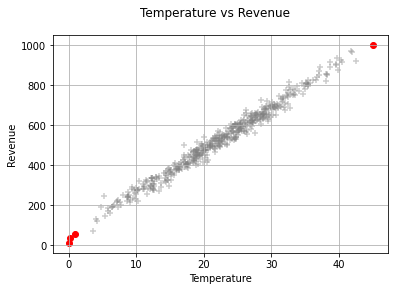

In [12]:
plt.suptitle('Temperature vs Revenue')
plt.scatter(df['Temperature'], df['Revenue'], c = 'gray', marker = '+', alpha = 0.4)
plt.scatter(o_df['Temperature'], o_df['Revenue'], c = 'red', alpha = 1)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.grid()
plt.show()

In [13]:
print(m_df.shape)
tsize = (m_df.shape[0] * 3) / 10
print(f'{m_df.shape[0]} -> {int(tsize)}')
X = m_df.iloc[:,:-1].values
y = m_df.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(tsize), random_state=0)

(496, 2)
496 -> 148


In [14]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print(f'<Best Ratio> Train score: {modelo.score(X_train, y_train)} , Test score: {modelo.score(X_test, y_test)}')

<Best Ratio> Train score: 0.9779867836189517 , Test score: 0.9796097511649794


- test_size = (m_df.shape[0] * 1) / 10 --> Train score: 0.9797474997784509 , Test score: 0.9790056521576924
- test_size = (m_df.shape[0] * 2) / 10 --> Train score: 0.9784588090829955 , Test score: 0.9842629309489909
- test_size = (m_df.shape[0] * 3) / 10 --> Train score: 0.9768622382392503 , Test score: 0.985337999718635
- test_size = (m_df.shape[0] * 4) / 10 --> Train score: 0.9761368759040135 , Test score: 0.9844209696513108
- test_size = (m_df.shape[0] * 5) / 10 --> Train score: 0.9770753607097548 , Test score: 0.9821278784416211
- test_size = (m_df.shape[0] * 6) / 10 --> Train score: 0.9770753607097548 , Test score: 0.9821278784416211
- test_size = (m_df.shape[0] * 7) / 10 --> Train score: 0.9785099235101823 , Test score: 0.9801353065252697
- test_size = (m_df.shape[0] * 8) / 10 --> Train score: 0.9779317491146321 , Test score: 0.979503024946085
- test_size = (m_df.shape[0] * 9) / 10 --> Train score: 0.9704790153858589 , Test score: 0.9792345935405591

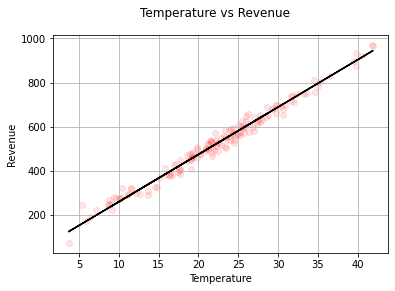

In [15]:
y_pred = modelo.predict(X_test)
plt.suptitle('Temperature vs Revenue')
plt.scatter(X_test, y_test, c = 'red', alpha = 0.1)
plt.plot(X_test, y_pred, c = 'black')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.grid()
plt.show()

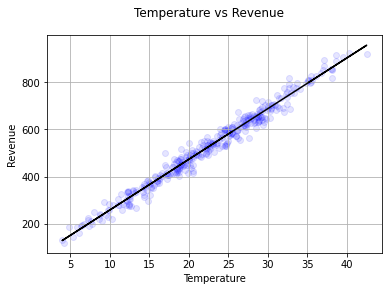

In [16]:
y_pred = modelo.predict(X_train)
plt.suptitle('Temperature vs Revenue')
plt.scatter(X_train, y_train, c = 'blue', alpha = 0.1)
plt.plot(X_train, y_pred, c = 'black')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.grid()
plt.show()

---
# FuelEconomy

Dentro de este dataset se encuentran 2 columnas, la primera son los valores de caballos de fuerza en un vehiculo y la segunda contiene el rendimiento de gasolina (esta en Millas por galon  MPG).

In [17]:
df = pd.read_csv('http://virtualfif.uaq.mx/diplomado/data/practica_1/FuelEconomy.csv')
df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [19]:
df.shape

(100, 2)

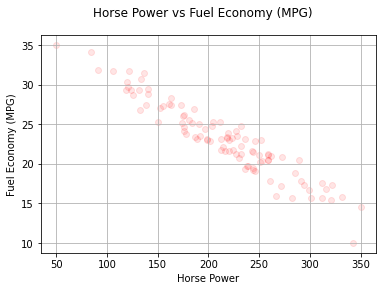

In [20]:
plt.suptitle('Horse Power vs Fuel Economy (MPG)')
plt.scatter(df['Horse Power'], df['Fuel Economy (MPG)'], c = 'red', alpha = 0.1)
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.grid()
plt.show()

174.99651385, 218.92840225, 251.7064757
Rango intercuartílico: 76.70996184999998
59.931571075000036, 366.77141847499996


C:\Users\Tank3\.conda\envs\ML2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Horse Power,Fuel Economy (MPG)
37,50.0,35.0


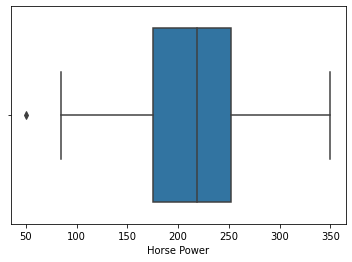

In [21]:
sbn.boxplot(df['Horse Power'])
Q1 = df['Horse Power'].quantile(0.25)
Q2 = df['Horse Power'].quantile(0.50)
Q3 = df['Horse Power'].quantile(0.75)
print(f'{Q1}, {Q2}, {Q3}')
IQR = Q3 - Q1
print(f'Rango intercuartílico: {IQR}')
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print(f'{lower_fence}, {upper_fence}')
o_df = df[(df['Horse Power'] < lower_fence) | (df['Horse Power'] > upper_fence)]
o_df

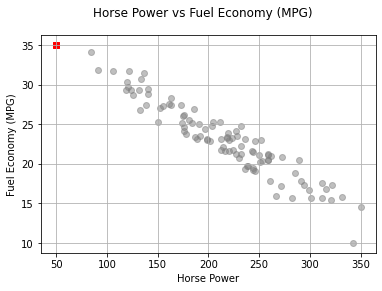

In [22]:
plt.suptitle('Horse Power vs Fuel Economy (MPG)')
plt.scatter(df['Horse Power'], df['Fuel Economy (MPG)'], c = 'grey', alpha = 0.5)
plt.scatter(o_df['Horse Power'], o_df['Fuel Economy (MPG)'], c = 'red', marker='s')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.grid()
plt.show()

20.439515550000003, 23.143191975, 26.0899329225
Rango intercuartílico: 5.650417372499998
11.963889491250006, 34.56555898125


C:\Users\Tank3\.conda\envs\ML2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Horse Power,Fuel Economy (MPG)
37,50.000000,35.0
89,342.906239,10.0


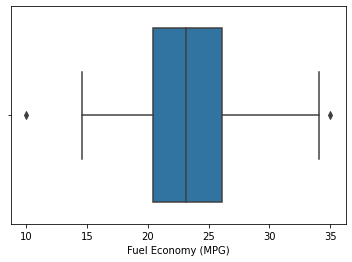

In [23]:
sbn.boxplot(df['Fuel Economy (MPG)'])
Q1 = df['Fuel Economy (MPG)'].quantile(0.25)
Q2 = df['Fuel Economy (MPG)'].quantile(0.50)
Q3 = df['Fuel Economy (MPG)'].quantile(0.75)
print(f'{Q1}, {Q2}, {Q3}')
IQR = Q3 - Q1
print(f'Rango intercuartílico: {IQR}')
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print(f'{lower_fence}, {upper_fence}')
o_df = df[(df['Fuel Economy (MPG)'] < lower_fence) | (df['Fuel Economy (MPG)'] > upper_fence)]
o_df

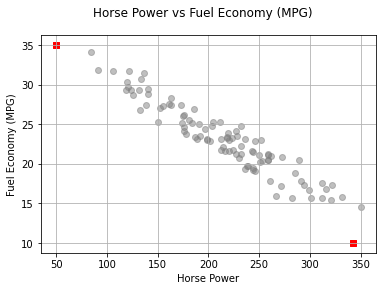

In [24]:
plt.suptitle('Horse Power vs Fuel Economy (MPG)')
plt.scatter(df['Horse Power'], df['Fuel Economy (MPG)'], c = 'grey', alpha = 0.5)
plt.scatter(o_df['Horse Power'], o_df['Fuel Economy (MPG)'], c = 'red', marker='s')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.grid()
plt.show()

In [25]:
m_df = df[(df['Fuel Economy (MPG)'] > lower_fence) & (df['Fuel Economy (MPG)'] < upper_fence)]
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         98 non-null     float64
 1   Fuel Economy (MPG)  98 non-null     float64
dtypes: float64(2)
memory usage: 2.3 KB


In [26]:
print(m_df.shape)
tsize = (m_df.shape[0] * 3) / 10
print(f'{m_df.shape[0]} -> {int(tsize)}')
X = m_df.iloc[:,:-1].values
y = m_df.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(tsize), random_state=0)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print(f'<Best Ratio> Train score: {modelo.score(X_train, y_train)} , Test score: {modelo.score(X_test, y_test)}')

(98, 2)
98 -> 29
<Best Ratio> Train score: 0.9016344773200301 , Test score: 0.9008892180868455


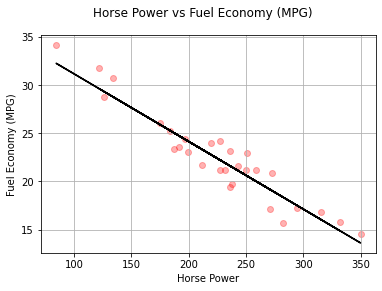

In [27]:
y_pred = modelo.predict(X_test)
plt.suptitle('Horse Power vs Fuel Economy (MPG)')
plt.scatter(X_test, y_test, c = 'red', alpha = 0.3)
plt.plot(X_test, y_pred, c = 'black')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.grid()
plt.show()

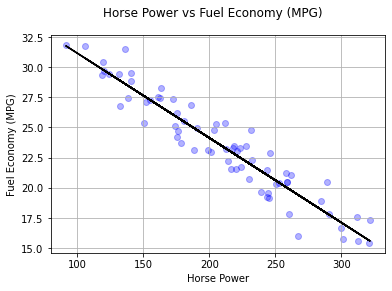

In [28]:
y_pred = modelo.predict(X_train)
plt.suptitle('Horse Power vs Fuel Economy (MPG)')
plt.scatter(X_train, y_train, c = 'blue', alpha = 0.3)
plt.plot(X_train, y_pred, c = 'black')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.grid()
plt.show()

---
# SAT_GPA

Dentro de este dataset se encuentran 2 columnas, la primera son las calificaciones de un alumno en la prueba SAT Reasoning Test y la segunda contiene la calificacion del alumno segun el promedio de calificaciones GPA a escala de 4 .

In [29]:
df = pd.read_csv('http://virtualfif.uaq.mx/diplomado/data/practica_1/SAT_GPA.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [31]:
df.shape

(84, 2)

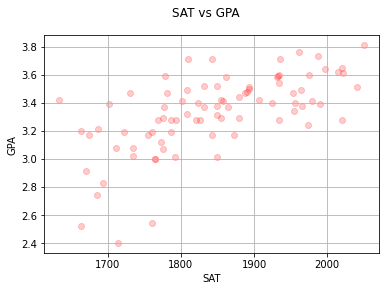

In [32]:
plt.suptitle('SAT vs GPA')
plt.scatter(df['SAT'], df['GPA'], c = 'red', alpha = 0.2)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.grid()
plt.show()

1772.0, 1846.0, 1934.0
Rango intercuartílico: 162.0
1529.0, 2177.0


C:\Users\Tank3\.conda\envs\ML2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,SAT,GPA


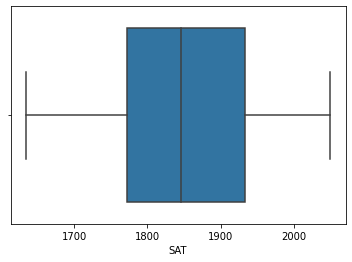

In [33]:
sbn.boxplot(df['SAT'])
Q1 = df['SAT'].quantile(0.25)
Q2 = df['SAT'].quantile(0.50)
Q3 = df['SAT'].quantile(0.75)
print(f'{Q1}, {Q2}, {Q3}')
IQR = Q3 - Q1
print(f'Rango intercuartílico: {IQR}')
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print(f'{lower_fence}, {upper_fence}')
o_df = df[(df['SAT'] < lower_fence) | (df['SAT'] > upper_fence)]
o_df

3.19, 3.38, 3.5025
Rango intercuartílico: 0.3125
2.72125, 3.97125


C:\Users\Tank3\.conda\envs\ML2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54


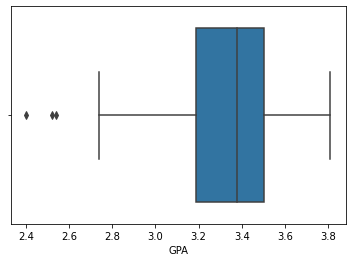

In [34]:
sbn.boxplot(df['GPA'])
Q1 = df['GPA'].quantile(0.25)
Q2 = df['GPA'].quantile(0.50)
Q3 = df['GPA'].quantile(0.75)
print(f'{Q1}, {Q2}, {Q3}')
IQR = Q3 - Q1
print(f'Rango intercuartílico: {IQR}')
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print(f'{lower_fence}, {upper_fence}')
o_df = df[(df['GPA'] < lower_fence) | (df['GPA'] > upper_fence)]
o_df

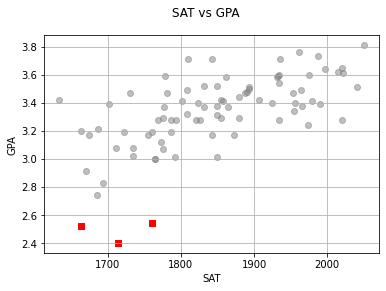

In [35]:
plt.suptitle('SAT vs GPA')
plt.scatter(df['SAT'], df['GPA'], c = 'grey', alpha = 0.5)
plt.scatter(o_df['SAT'], o_df['GPA'], c = 'red', marker='s')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.grid()
plt.show()

In [36]:
m_df = df[(df['GPA'] > lower_fence) & (df['GPA'] < upper_fence)]
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 3 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     81 non-null     int64  
 1   GPA     81 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


Best index and score ratio: 8 <-> 0.8982858601844385


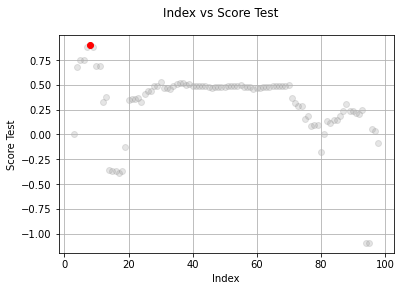

In [37]:
ratiosx = []
ratiosy = []
for i in range(3, 99):
    tsize = (m_df.shape[0] * i) / 100
    X = m_df.iloc[:,:-1].values
    y = m_df.iloc[:,1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(tsize), random_state=0)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    ratiosx.append(i)
    ratiosy.append(modelo.score(X_test, y_test))
plt.suptitle('Index vs Score Test')
plt.scatter(ratiosx, ratiosy, c = 'grey', alpha = 0.2)
print(f'Best index and score ratio: {ratiosx[ratiosy.index(max(ratiosy))]} <-> {max(ratiosy)}')
plt.scatter(ratiosx[ratiosy.index(max(ratiosy))], max(ratiosy), c = 'red', alpha = 1)
plt.xlabel('Index')
plt.ylabel('Score Test')
plt.grid()
plt.show()

In [38]:
print(m_df.shape)
tsize = (m_df.shape[0] * (ratiosx[ratiosy.index(max(ratiosy))])) / 100
print(f'{m_df.shape[0]} -> {int(tsize)}')
X = m_df.iloc[:,:-1].values
y = m_df.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(tsize), random_state=0)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print(f'<Best Ratio> Train score: {modelo.score(X_train, y_train)} , Test score: {modelo.score(X_test, y_test)}')
ratiosx.append(i)
ratiosy.append(modelo.score(X_test, y_test))

(81, 2)
81 -> 6
<Best Ratio> Train score: 0.3719955603923293 , Test score: 0.8982858601844385


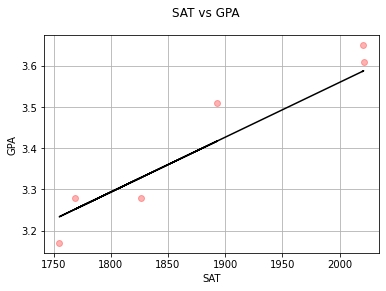

In [39]:
y_pred = modelo.predict(X_test)
plt.suptitle('SAT vs GPA')
plt.scatter(X_test, y_test, c = 'red', alpha = 0.3)
plt.plot(X_test, y_pred, c = 'black')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.grid()
plt.show()

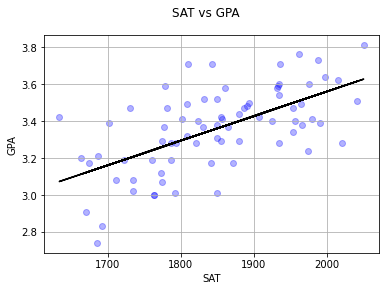

In [40]:
y_pred = modelo.predict(X_train)
plt.suptitle('SAT vs GPA')
plt.scatter(X_train, y_train, c = 'blue', alpha = 0.3)
plt.plot(X_train, y_pred, c = 'black')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.grid()
plt.show()

---